In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sqlalchemy import text
import warnings
warnings.filterwarnings('ignore')

# Imports específicos del proyecto
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from database.connection import get_db_manager

In [2]:
# Conexión BD
db = get_db_manager()

# Query unificado 5 grandes ligas domésticas
big5_query = """
SELECT *
FROM footballdecoded.players_domestic p
WHERE p.league IN (
    'ENG-Premier League',
    'ESP-La Liga', 
    'ITA-Serie A',
    'GER-Bundesliga',
    'FRA-Ligue 1'
)
ORDER BY p.league, p.season DESC, p.team, p.player_name
"""

# Extracción a DataFrame
df_big5 = pd.read_sql(big5_query, db.engine)
db.close()

df_big5.head()

,id,unique_player_id,player_name,normalized_name,league,season,team,teams_played,nationality,position,...,understat_metrics,fbref_official_name,understat_official_name,data_quality_score,processing_warnings,is_transfer,transfer_count,created_at,updated_at,processed_at
0,2775,4297cac0772af3c8,Ben White,Ben White,ENG-Premier League,2425,Arsenal,None,ENG,DF,...,"{'understat_xa': '1.4500398263335228', 'unders...",None,None,1.0,[],False,0,2025-07-24 12:31:09.555900,2025-07-24 12:31:09.555900,2025-07-24 12:31:09.555900
1,2776,258ed61985702bb2,Bukayo Saka,Bukayo Saka,ENG-Premier League,2425,Arsenal,None,ENG,"FW,MF",...,"{'understat_xa': '11.583731275051832', 'unders...",None,None,1.0,[],False,0,2025-07-24 12:31:15.730848,2025-07-24 12:31:15.730848,2025-07-24 12:31:15.730848
2,2777,57f809b3be3768e0,David Raya,David Raya,ENG-Premier League,2425,Arsenal,None,ESP,GK,...,"{'understat_xa': '0.09363602846860886', 'under...",None,None,1.0,[],False,0,2025-07-24 12:31:22.292846,2025-07-24 12:31:22.292846,2025-07-24 12:31:22.292846
3,2778,bb58d04ee12cd7fd,Declan Rice,Declan Rice,ENG-Premier League,2425,Arsenal,None,ENG,MF,...,"{'understat_xa': '9.060594327747822', 'underst...",None,None,1.0,[],False,0,2025-07-24 12:31:28.623355,2025-07-24 12:31:28.623355,2025-07-24 12:31:28.623355
4,2779,40384e981d1a5c3c,Ethan Nwaneri,Ethan Nwaneri,ENG-Premier League,2425,Arsenal,None,ENG,"FW,MF",...,"{'understat_xa': '1.1617773352190852', 'unders...",None,None,1.0,[],False,0,2025-07-24 12:31:34.939683,2025-07-24 12:31:34.939683,2025-07-24 12:31:34.939683


In [3]:
# Posiciones únicas y conteos
positions = df_big5['position'].value_counts().sort_index()
print(f"Posiciones: {sorted(df_big5['position'].unique())}")

Posiciones: ['DF', 'DF,FW', 'DF,MF', 'FW', 'FW,DF', 'FW,MF', 'GK', 'MF', 'MF,DF', 'MF,FW']


In [4]:
# Filtrar MF como primera posición (MF, MF,FW, MF,DF)
df_midfielders = df_big5[df_big5['position'].str.startswith('MF')].copy()

In [5]:
# Extraer todas las métricas disponibles
fbref_metrics_all = set()
understat_metrics_all = set()

# Recorrer todos los registros para obtener métricas únicas
for _, row in df_midfielders.iterrows():
    if row['fbref_metrics']:
        fbref_metrics_all.update(row['fbref_metrics'].keys())
    if row['understat_metrics']:
        understat_metrics_all.update(row['understat_metrics'].keys())

print("MÉTRICAS FBREF DISPONIBLES:")
print("=" * 50)
fbref_sorted = sorted(list(fbref_metrics_all))
for i, metric in enumerate(fbref_sorted, 1):
    print(f"{i:2d}. {metric}")

print(f"\nTotal FBref: {len(fbref_sorted)}")

print("\n\nMÉTRICAS UNDERSTAT DISPONIBLES:")
print("=" * 50)
understat_sorted = sorted(list(understat_metrics_all))
for i, metric in enumerate(understat_sorted, 1):
    print(f"{i:2d}. {metric}")

print(f"\nTotal Understat: {len(understat_sorted)}")

MÉTRICAS FBREF DISPONIBLES:
 1. /90
 2. 2CrdY
 3. A-xAG
 4. Aerial Duels_Lost
 5. Aerial Duels_Won
 6. Aerial Duels_Won%
 7. Blocks_Blocks
 8. Blocks_Pass
 9. Blocks_Sh
10. CS
11. CS%
12. Carries_1/3
13. Carries_CPA
14. Carries_Carries
15. Carries_Dis
16. Carries_Mis
17. Carries_PrgC
18. Carries_PrgDist
19. Carries_TotDist
20. Challenges_Att
21. Challenges_Lost
22. Challenges_Tkl
23. Challenges_Tkl%
24. Corner Kicks_In
25. Corner Kicks_Out
26. Corner Kicks_Str
27. Crosses_Opp
28. Crosses_Stp
29. Crosses_Stp%
30. Crs
31. CrsPA
32. FK
33. Fld
34. Fls
35. G+A-PK
36. G-xG
37. GA90
38. GCA Types_Def
39. GCA Types_Fld
40. GCA Types_PassDead
41. GCA Types_PassLive
42. GCA Types_Sh
43. GCA Types_TO
44. GCA_GCA
45. GCA_GCA90
46. Goal Kicks_Att
47. Goal Kicks_AvgLen
48. Goal Kicks_Launch%
49. Goals_CK
50. Goals_FK
51. Goals_GA
52. Goals_OG
53. Goals_PKA
54. Launched_Att
55. Launched_Cmp
56. Launched_Cmp%
57. Min%
58. OG
59. Off
60. Outcomes_Blocks
61. Outcomes_Cmp
62. Outcomes_Off
63. PKcon
64. 

In [6]:
# Extraer minutos jugados de fbref_metrics
df_midfielders['minutes_played'] = df_midfielders['fbref_metrics'].apply(
    lambda x: x.get('minutes_played', 0) if x else 0
)

# Filtrar solo jugadores con más de 800 minutos
df_mf_800min = df_midfielders[df_midfielders['minutes_played'] > 800].copy()

In [7]:
def extract_metrics(df, col_name):
    """Extrae métricas numéricas de diccionarios"""
    result = pd.DataFrame(index=df.index)
    
    # Obtener todas las keys únicas
    all_keys = set()
    for _, row in df.iterrows():
        if isinstance(row[col_name], dict):
            all_keys.update(row[col_name].keys())
    
    # Extraer cada métrica
    for key in all_keys:
        values = []
        for _, row in df.iterrows():
            if isinstance(row[col_name], dict) and key in row[col_name]:
                try:
                    values.append(float(row[col_name][key]))
                except (ValueError, TypeError):
                    values.append(np.nan)
            else:
                values.append(np.nan)
        
        # Solo si tiene valores válidos
        if pd.Series(values).notna().sum() >= 5:
            result[key] = values
    
    return result

# Extraer
fbref_nums = extract_metrics(df_mf_800min, 'fbref_metrics')
understat_nums = extract_metrics(df_mf_800min, 'understat_metrics')

print(f"FBref: {fbref_nums.shape[1]} métricas")
print(f"Understat: {understat_nums.shape[1]} métricas")

FBref: 185 métricas
Understat: 10 métricas


In [8]:
# Percentiles
fbref_pct = fbref_nums.rank(pct=True) * 99 + 1
fbref_pct = fbref_pct.round(0).astype('Int64')
fbref_pct.columns = [f'{col}_pct' for col in fbref_pct.columns]

understat_pct = understat_nums.rank(pct=True) * 99 + 1
understat_pct = understat_pct.round(0).astype('Int64')
understat_pct.columns = [f'{col}_pct' for col in understat_pct.columns]

print(f"Percentiles: {fbref_pct.shape[1]} + {understat_pct.shape[1]}")

Percentiles: 185 + 10


In [9]:
# Métricas a excluir de per90 (ya normalizadas o ratios)
exclude_per90 = {
    'pass_completion_pct', 'shots_on_target_pct', 'Take-Ons_Succ%', 'Take-Ons_Tkld%', 
    'Aerial Duels_Won%', 'Challenges_Tkl%', 'Save%', 'Launched_Cmp%', 'Crosses_Stp%',
    'shots_per_90', 'GA90', 'GCA_GCA90', 'SCA_SCA90', 'Team Success_+/-90', 'SoT/90',
    'npxG/Sh', 'xG+xAG', 'non_penalty_xG_plus_xAG', 'avg_shot_distance', 'minutes_per_match',
    'Passes_AvgLen', 'Goal Kicks_AvgLen', 'Starts_Mn/Start', 'Subs_Mn/Sub', 'Min%',
    'matches_played', 'matches_started', 'minutes_played', 'wins', 'draws', 'losses',
    'understat_buildup_involvement_pct', 'understat_player_id', 'understat_team_id'
}

# Per90 FBref
fbref_per90 = fbref_nums.loc[:, ~fbref_nums.columns.isin(exclude_per90)]
fbref_per90 = (fbref_per90.div(df_mf_800min['minutes_played'], axis=0) * 90).round(3)
fbref_per90.columns = [f'{col}_per90' for col in fbref_per90.columns]

# Per90 Understat
understat_per90 = understat_nums.loc[:, ~understat_nums.columns.isin(exclude_per90)]
understat_per90 = (understat_per90.div(df_mf_800min['minutes_played'], axis=0) * 90).round(3)
understat_per90.columns = [f'{col}_per90' for col in understat_per90.columns]

print(f"Per90: {fbref_per90.shape[1]} + {understat_per90.shape[1]}")

Per90: 154 + 7


In [10]:
# DataFrame final
df_final = pd.concat([
    df_mf_800min[['player_name', 'team', 'league', 'season', 'position', 'minutes_played']],
    fbref_nums,           # Métricas originales FBref
    understat_nums,       # Métricas originales Understat
    fbref_pct,           # Percentiles FBref
    understat_pct,       # Percentiles Understat
    fbref_per90,         # Per90 FBref
    understat_per90      # Per90 Understat
], axis=1)

print(f"DataFrame final: {df_final.shape}")
print(f"Columnas: básicas(6) + fbref({fbref_nums.shape[1]}) + understat({understat_nums.shape[1]}) + percentiles({fbref_pct.shape[1]+understat_pct.shape[1]}) + per90({fbref_per90.shape[1]+understat_per90.shape[1]})")

# Verificar
sample = df_final.iloc[0]
print(f"\nEjemplo - {sample['player_name']}:")
print(f"Goles: {sample.get('goals', 'N/A')} | Percentil: {sample.get('goals_pct', 'N/A')} | Per90: {sample.get('goals_per90', 'N/A')}")

DataFrame final: (504, 557)
Columnas: básicas(6) + fbref(185) + understat(10) + percentiles(195) + per90(161)

Ejemplo - Declan Rice:
Goles: 4.0 | Percentil: 79 | Per90: 0.127


In [12]:
# Buscar jugadores en el DataFrame
search1 = df_midfielders[df_midfielders['player_name'].str.contains('Pedri', case=False, na=False)]
search2 = df_midfielders[df_midfielders['player_name'].str.contains('Bellingham', case=False, na=False)]

for _, player in search1.iterrows():
    print(f"  {player['unique_player_id']} - {player['player_name']} ({player['team']}, {player['league']})")
    
for _, player in search2.iterrows():
    print(f"  {player['unique_player_id']} - {player['player_name']} ({player['team']}, {player['league']})")

  8c50fb1a1662d90f - Pedri (Barcelona, ESP-La Liga)
  1b18fe1684f965aa - Jude Bellingham (Real Madrid, ESP-La Liga)


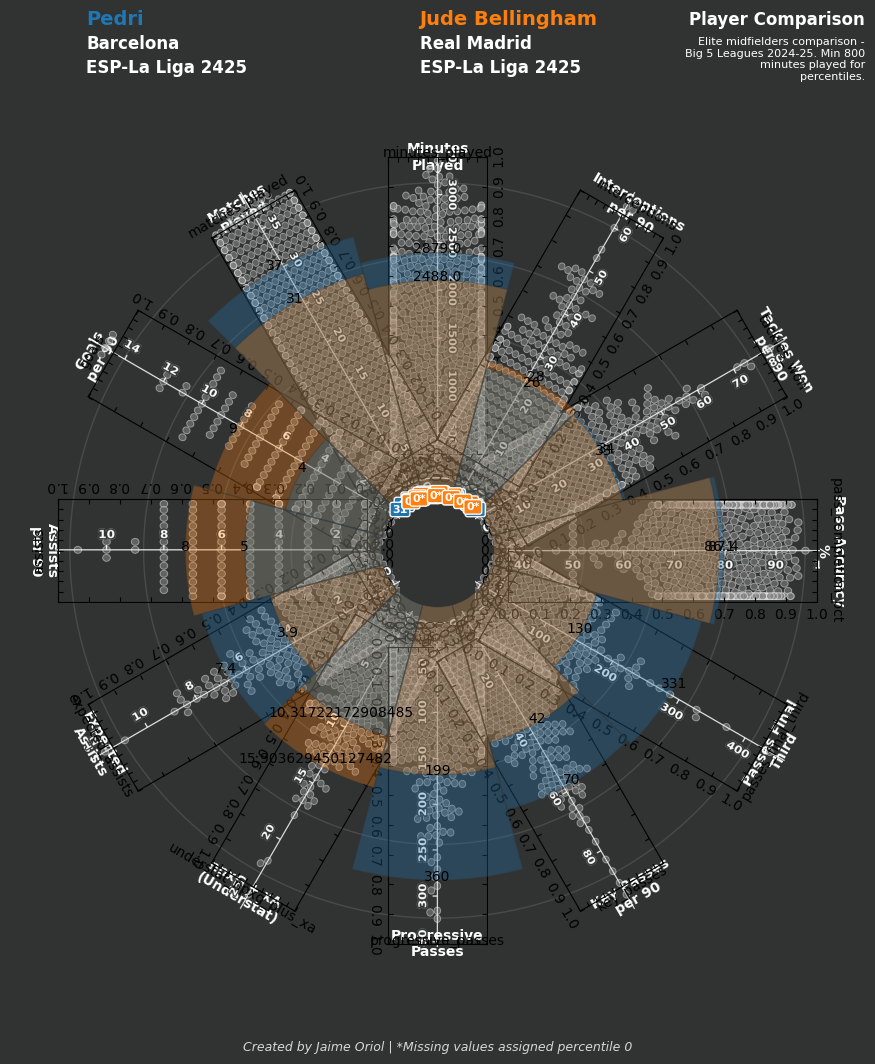

In [ ]:
# Import del archivo .py
from swarm_radar import PlayerPizzaChart, create_pizza_chart

# Configuración de métricas para centrocampistas
config = {
    'metrics': [
        'minutes_played',               # Contexto disponibilidad
        'matches_played',               # Contexto partidos
        'goals',                        # Amenaza goleadora
        'assists',                      # Asistencias directas
        'expected_assists',             # Calidad creación
        'understat_npxg_plus_xa',       # Impacto ofensivo total
        'progressive_passes',           # Progresión del juego
        'key_passes',                   # Pases clave
        'passes_final_third',           # Llegada zona peligrosa
        'pass_completion_pct',          # Eficiencia técnica
        'tackles_won',                  # Recuperación defensiva
        'interceptions'                 # Lectura defensiva
    ],
    'titles': [
        'Minutes\nPlayed',
        'Matches\nPlayed',
        'Goals\nper 90',
        'Assists\nper 90',
        'Expected\nAssists',
        'npxG + xA\n(Understat)',
        'Progressive\nPasses',
        'Key Passes\nper 90',
        'Passes Final\nThird',
        'Pass Accuracy\n%',
        'Tackles Won\nper 90',
        'Interceptions\nper 90'
    ]
}

# Crear pizza chart para Pedri
fig = create_pizza_chart(
    df=df_final,
    player_name="8c50fb1a1662d90f",
    metrics_config=config,
    title_suffix="Barcelona - La Liga 2023/24",
    slice_color="#1A78CF",
    figsize=(10, 10)
)

plt.tight_layout()
plt.show()